# Monte Carlo simulation
**Monte Carlo methods, or Monte Carlo experiments,** are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. 


## Simulate Integration 

We simulate the area of $sin(x)$ from $0$ to $\pi$ that is given by $\int_{o}^{\pi} sin(x) = -cos(x) \Big|_0^{\pi} = 2 $ <br>
<br>
We can approximate the area with the formula $ (b-a) \frac{1}{N} \sum_{i=1}^{N} f(x_i)$ in our case $ (b-a) \frac{1}{N} \sum_{i=1}^{N} sin(x_i)$ <br><br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
areas =[]
N=10000
for i in range(N): 
    b = np.pi # upper limit
    a = 0 # lower limit
    answer = (b-a)/N * np.sin(np.random.uniform(a,b,N)).sum()
    areas.append(answer)

mu :  1.9998960577825335
sigma :  0.009690170108233634


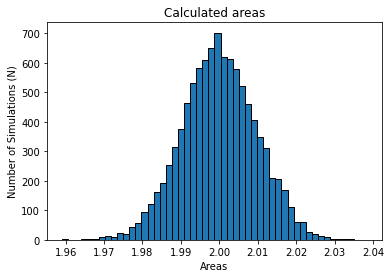

In [ ]:
mu = np.array(areas).mean()
sigma = np.array(areas).std()
print("mu : ",mu)
print("sigma : ",sigma)
plt.hist(areas, bins=50,ec='black')
plt.title("Monte Carlo Integration")
plt.xlabel("Areas")
plt.ylabel("Number of Simulations (N)")
plt.show()

## Simulate Pi 

Equation of radius circle : $$(x - x_i)^2 + (y - y_i)^2 = r^2$$
Circumference's length of circle : $$2 \pi r$$ 

Observe that the areas of the circle and square and the randomly-generated pairs are related by:

$$ \frac{\text{AreaOfCircle}}{\text{AreaOfSquare}} = \frac{\pi\cdot(0.5)^2}{1} = \frac{\pi}{4} \approx \frac{\text{NumberOfPointsInCircle}}{\text{TotalNumberOfPairsGenerated}} $$

and hence that 

$$ \pi \approx 4 \times \frac{\text{NumberOfPairsInCircle}}{\text{TotalNumberOfPairsGenerated}} $$


simulating 5 times pi  : 4.0 vs Ideal : 3.141592653589793
simulating 50 times pi  : 4.0 vs Ideal : 3.141592653589793
simulating 500 times pi  : 4.0 vs Ideal : 3.141592653589793
simulating 50000 times pi  : 4.0 vs Ideal : 3.141592653589793


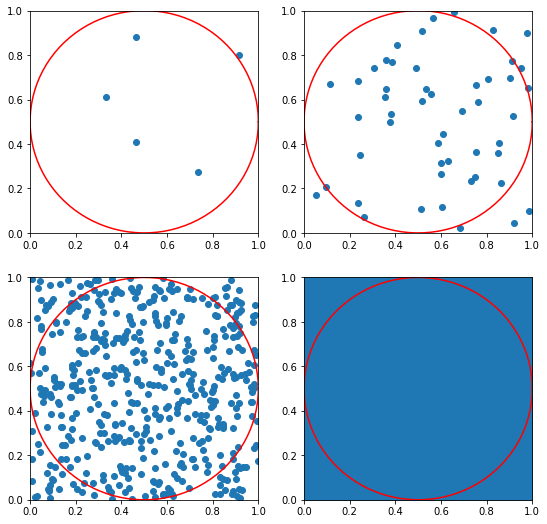

In [ ]:
plt.figure(figsize=(9,9))

theta = np.linspace(0, 2*np.pi, 100)   #for circle, plotted in every subplot for x,y below
x = 0.5 + 0.5 * np.cos(theta)
y = 0.5 + 0.5 * np.sin(theta)
circle_point = 0
square_point = 0
L = [5, 50, 500, 50000]

for i in L:
    x1,y1 = [],[]
    for j in range(0,i):
        x1.append(random.uniform(0,1)) #change range (0,1) -> (-1,1) circle size will shrink
        y1.append(random.uniform(0,1))
    
    xmid=np.mean(x1)
    ymid=np.mean(y1)
    # calculate pi value , check if (x1,y1) lies inside the circle or not
    r = sum(xmid-x1)**2+sum(ymid-y1)**2
    if r<=1:
        circle_point+=1
    square_point+=1
    pi = 4 * circle_point/ square_point
    print(f"simulating {i} times pi  : {pi} vs Ideal : {np.pi}")
    plt.subplot(2, 2, (L.index(i)+1))
    plt.plot(x, y, color = 'red')
    plt.title("Monte Carlo Pi")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.scatter(x1, y1)
    
    plt.plot()

simulating 1000000 times pi  : 3.139537031283304 vs Ideal : 3.141592653589793


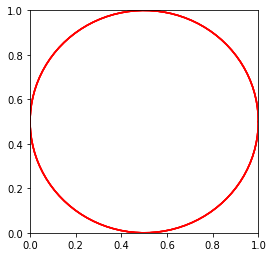

In [ ]:
N = 1000
circle_points = 0
square_points = 0
pi_list =[]

plt.figure(figsize=(9,9))

theta = np.linspace(0, 2*np.pi, 100)   #for circle, plotted in every subplot for x,y below
x = 0.5 + 0.5 * np.cos(theta)
y = 0.5 + 0.5 * np.sin(theta)
j = 0
# Total Random numbers generated = possible x values* possible y values
for i in range(N**2):
    x1 = random.uniform(-1, 1)
    y1 = random.uniform(-1, 1)
    r = x1**2 + y1**2
    # Checking if (x, y) lies inside the circle
    if r <= 1:
        circle_points += 1
    square_points += 1
    pi = 4 * circle_points / square_points
    pi_list.append(pi)
    if i>=(N**2-4):
        plt.subplot(2, 2, (i-j+1))
        plt.plot(x, y, color = 'red')
        plt.title("Monte Carlo Pi")
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.scatter(x1, y1)
        plt.plot()
    j+=1
print(f"simulating {N**2} times pi  : {np.mean(pi_list)} vs Ideal : {np.pi}") 


### Simulate coin Toss

Toss an unbiased coin 10 times & calculate the probability of getting head , check if it's
0.5 or not, if not run the simulation [1,10,100,1000] times & check if probability score gets to 
it's theoretical value

In [ ]:
def toss_coin():
	x = random.uniform(0,1) # 0.5 ideally
	if x > 0.5:
		return True
	else:
		return False

In [ ]:
def mc_simulation(N,n):
	prob = []
	for _ in range(N):
		results = []
		for i in range(n):
			res = toss_coin()
			results.append(res)
		heads = sum(results)/n
		prob.append(heads)

	return prob,sum(prob)/N

Simuating 10 unbiased coin toss for 1 times : 0.4
Simuating 10 unbiased coin toss for 10 times : 0.4699999999999999
Simuating 10 unbiased coin toss for 100 times : 0.5110000000000001
Simuating 10 unbiased coin toss for 1000 times : 0.4908000000000008


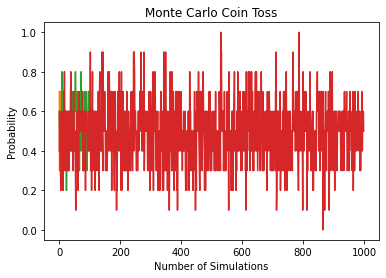

In [ ]:
plt.title("Monte Carlo Coin Toss")
plt.xlabel("Number of Simulations")
plt.ylabel("Probability")

n = 10

for N in [1,10,100,1000]:
    prob,heads = mc_simulation(N,n)
    print(f"Simuating {n} unbiased coin toss for {N} times : {heads}")
    plt.plot(prob)